In [ ]:
### Installing required packages and importing packages.

%pip install qiskit[visualization]
print("Finished first package")
%pip install qiskit_aer
print("Finished second package")
%pip install qiskit_ibm_runtime
print("Finished third package")
print("Required packages installed.")

In [3]:
# Importing packages.

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [6]:
# CNOT on Non-Adjacent Qubits Example
quantumReg = QuantumRegister(3, 'q')
classicalReg = ClassicalRegister(3, 'c')
qCircuit = QuantumCircuit(quantumReg, classicalReg)



# Protecting API Key

In [ ]:
# Protecting API Key with dotenv?
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing necessary packages from dotenv
import os
from dotenv import load_dotenv

In [ ]:
# 1. Load the .env file
# This command looks for the .env file in the current directory and loads
# the variables into the operating system's environment.
load_dotenv()

# 2. Access the variables using os.environ.get()
# Use .get() to prevent errors if the key isn't found.
my_api_key = os.environ.get("MY_API_KEY")
db_name = os.environ.get("DATABASE_NAME")
debug = os.environ.get("DEBUG_MODE")

# Selecting Hardware to run Quantum Circuits (ibm_torino)

The selected backend has a great impact on result of transpilation. This is due to different basis gates and different qubit connectivity layouts which vary with each computer.

qiskit_runtime_service.__init__:WARNING:2025-11-17 18:32:34,910: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.__init__:WARNING:2025-11-17 18:32:39,311: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:

ibm_torino


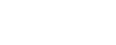

In [ ]:
# Selecting hardware backend to run on. The backend we use has great effect on final output of transpilation.

## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    token = '9baE0l0kL98ZiqyrDUBnDsviLvkj7Ci8vG0ptyPvj0MJ',
    set_as_default = True,
    overwrite = True
    )

service = QiskitRuntimeService()

# Selects ibm_torino as the quantum computer to transpile the circuit for.
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.backend("ibm_torino")
# Basis Gates of ibm_torino: ['cz', 'id', 'rx', 'rz', 'rzz', 'sx', 'x']
print(backend.name)

## Convert your circuit down to necessary basis gates for the backend you just selected
target = backend.target
# The target object contains all the information about the qubit connectivity (coupling map), and basis gates.
print(target)
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa_circuit = pm.run(qCircuit)
qc_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

# Now the circuit is transpiled and ready to be run on the selected backend!